+ Name: Vanshita
+ Roll Number: 2021101102

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [47]:
df = pd.read_csv('housing.csv')
label_encoder = LabelEncoder()

# Apply LabelEncoder to 'ocean_proximity' column
df['ocean_proximity_encoded'] = label_encoder.fit_transform(df['ocean_proximity'])
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ocean_proximity_encoded
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


### **Correlation map**

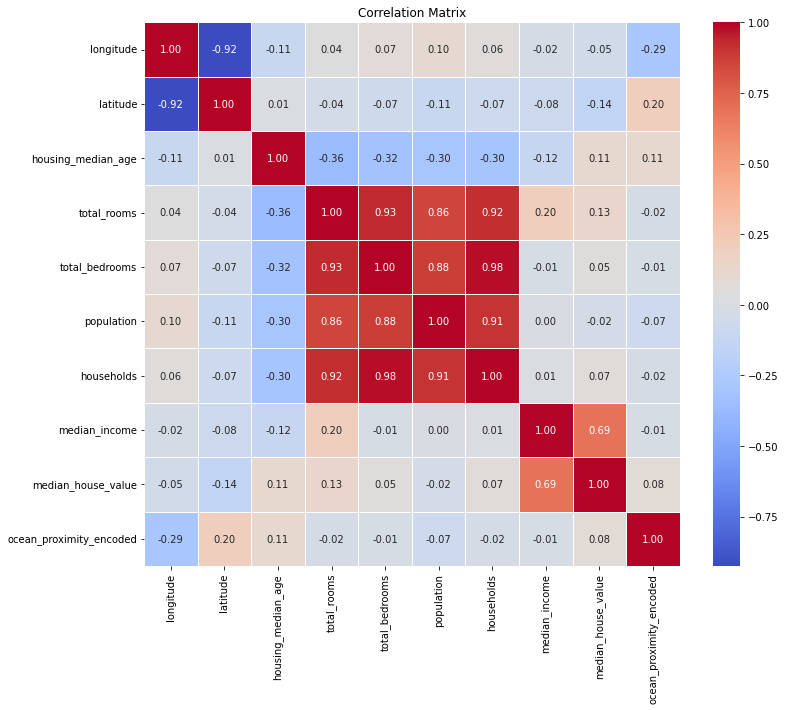

In [48]:
# Drop the original 'ocean_proximity' column
numeric_df = df.drop(columns=['ocean_proximity'])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


### **Correlation Observations**

1. There is strong positive correlation between every pair of variables in the set of variables **`total_rooms`**, **`total_bedrooms`**, **`population`** and **`households`**.  i.e., as one increases, the other also increases.

2. There is also a strong positive correlation between **`median_income`** and **`median_house_value`**

2. There is a high negative correlation between the variables **`latitude`** and **`longitude`**

4. **`latitude`** and **`longitude`** have a weak or negligible correlation with most other features

### **Linear Regression**

#### Model 1 - include all parameters to predict median house value

In [49]:
X1 = df[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']]

# Target variable (dependent variable)
y = df['median_house_value']

# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scale values 
scaler = StandardScaler()
X_scaled_1 = scaler.fit_transform(X1)

# Impute missing values in X_train and X_test with mean values of respective columns
imputer = SimpleImputer(strategy='mean')
X_imputed_1= imputer.fit_transform(X_scaled_1)

In [50]:
ols_model_1 = LinearRegression()
ols_model_1.fit(X_imputed_1, y)

# Predictions on the testing set
ols_predictions_1 = ols_model_1.predict(X_imputed_1)

# Calculate Mean Squared Error
ols_mse_1 = mean_squared_error(y, ols_predictions_1)
print("OLS Mean Squared Error:", ols_mse_1)

r2_ols_1 = ols_model_1.score(X_imputed_1, y)
print("Coefficient of determination (R^2) for testing set:", r2_ols_1)

OLS Mean Squared Error: 4851633659.516419
Coefficient of determination (R^2) for testing set: 0.635640226342306


In [51]:
X_1_constant = sm.add_constant(X_imputed_1)
ols_model_1 = sm.OLS(y, X_1_constant).fit()
print(ols_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     4499.
Date:                Fri, 12 Apr 2024   Prob (F-statistic):               0.00
Time:                        23:03:13   Log-Likelihood:            -2.5945e+05
No. Observations:               20640   AIC:                         5.189e+05
Df Residuals:                   20631   BIC:                         5.190e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.069e+05    484.935    426.564      0.0

#### Plotting residuals for model 1

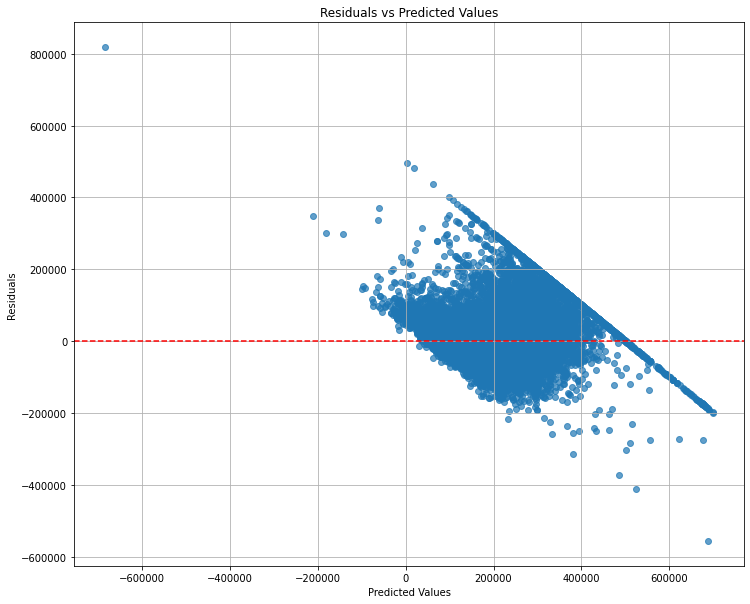

In [52]:
residuals_1 = y - ols_predictions_1

# Plot residuals against predicted values
plt.figure(figsize=(12, 10))
plt.scatter(ols_predictions_1, residuals_1, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.grid(True)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

#### Model 2 - only using total rooms, total bedrooms, population, household and median age

In [53]:
X2 = df[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households']]
X_scaled_2 = scaler.fit_transform(X2)

# Impute missing values in X_train and X_test with mean values of respective columns
imputer = SimpleImputer(strategy='mean')
X_imputed_2 = imputer.fit_transform(X_scaled_2)

ols_model_2 = LinearRegression()
ols_model_2.fit(X_imputed_2, y)

# Predictions on the testing set
ols_predictions_2 = ols_model_2.predict(X_imputed_2)

# Calculate Mean Squared Error
ols_mse_2 = mean_squared_error(y, ols_predictions_2)
print("OLS Mean Squared Error:", ols_mse_2)

r2_ols_2 = ols_model_2.score(X_imputed_2, y)
print("Coefficient of determination (R^2) for testing set:", r2_ols_2)

OLS Mean Squared Error: 11268886964.614452
Coefficient of determination (R^2) for testing set: 0.15370174420582416


In [54]:
X_2_constant = sm.add_constant(X_imputed_2)
ols_model_2 = sm.OLS(y, X_2_constant).fit()
print(ols_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     749.5
Date:                Fri, 12 Apr 2024   Prob (F-statistic):               0.00
Time:                        23:03:13   Log-Likelihood:            -2.6815e+05
No. Observations:               20640   AIC:                         5.363e+05
Df Residuals:                   20634   BIC:                         5.364e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.069e+05    739.007    279.910      0.0

### Plotting residuals for model 2

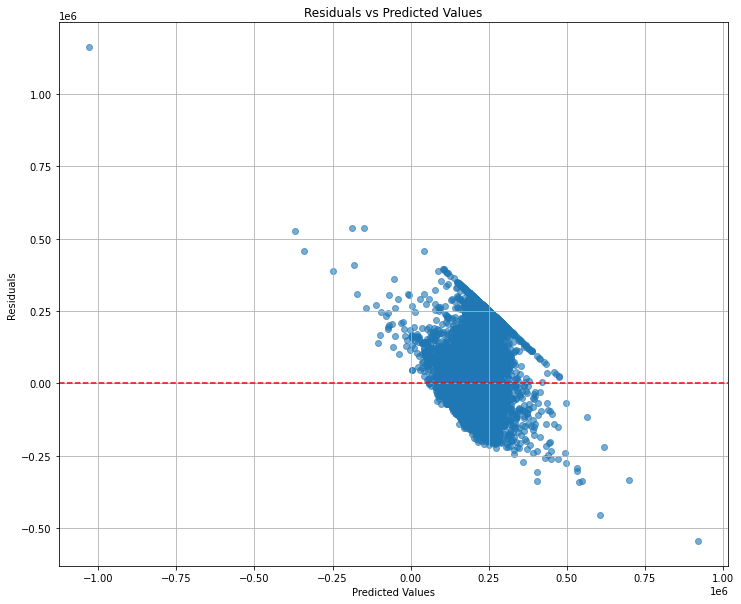

In [55]:
residuals_2 = y - ols_predictions_2

# Plot residuals against predicted values
plt.figure(figsize=(12, 10))
plt.scatter(ols_predictions_2, residuals_2, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.grid(True)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

### **Observations**

1. The lower value of R^2 in the second model indicates that the chosen features / variables in the regression model explain less of the variance in the dependent variable.

2. Notably, we only took those variables as predictors in model 2 which already had high correlation amongst themselves. Hence, the result is justified since we only picked one type of predictors and did not account for the variance caused by other independent variables

## **Using VIF to check collinearity**

In [56]:
vif = pd.DataFrame()
vif["Features"] = range(X_imputed_1.shape[1])  
vif["VIF"] = [variance_inflation_factor(X_imputed_1, i) for i in range(X_imputed_1.shape[1])]

vif


,Features,VIF
0,0,8.704362
1,1,8.826710
2,2,1.259049
3,3,12.152330
4,4,27.335867
5,5,6.264775
6,6,28.607645
7,7,1.691068


## Remove features with high VIF

Since the variables **`total_bedrooms`** and **`households`** have high VIF, we can remove them from the models.

### Model 1 after removing features

In [57]:
X3 = df[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'population', 'median_income']]
y = df['median_house_value']

# scale values 
scaler = StandardScaler()
X_scaled_3= scaler.fit_transform(X3)

# Impute missing values in X_train and X_test with mean values of respective columns
imputer = SimpleImputer(strategy='mean')
X_imputed_3 = imputer.fit_transform(X_scaled_3)

ols_model_3 = LinearRegression()
ols_model_3.fit(X_imputed_3, y)

# Predictions on the testing set
ols_predictions_3 = ols_model_3.predict(X_imputed_3)

# Calculate Mean Squared Error
ols_mse_3 = mean_squared_error(y, ols_predictions_3)
print("OLS Mean Squared Error:", ols_mse_3)

r2_ols_3 = ols_model_3.score(X_imputed_3, y)
print("Coefficient of determination (R^2) for testing set:", r2_ols_3)

OLS Mean Squared Error: 5176125645.144821
Coefficient of determination (R^2) for testing set: 0.6112707387151044


In [58]:
X_3_constant = sm.add_constant(X_imputed_3)
ols_model_3 = sm.OLS(y, X_3_constant).fit()
print(ols_model_3.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     5408.
Date:                Fri, 12 Apr 2024   Prob (F-statistic):               0.00
Time:                        23:03:13   Log-Likelihood:            -2.6012e+05
No. Observations:               20640   AIC:                         5.202e+05
Df Residuals:                   20633   BIC:                         5.203e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.069e+05    500.866    412.997      0.0

### Residual Plot for model 3

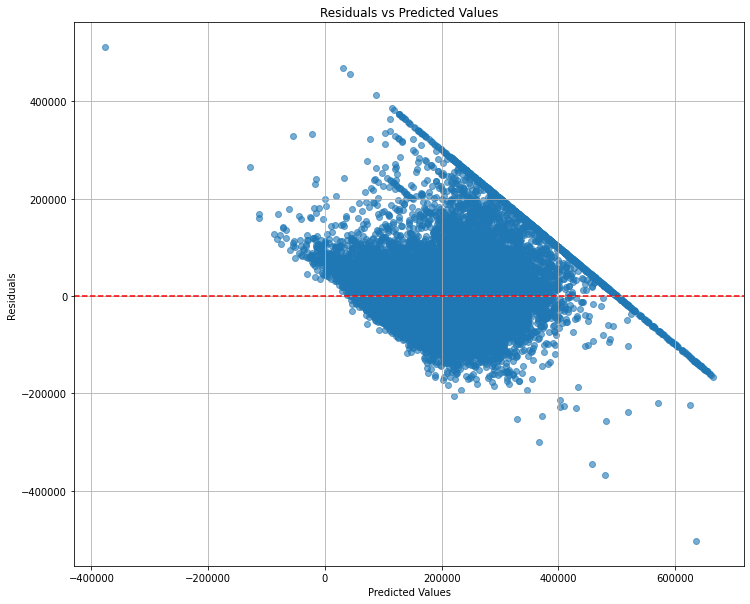

In [59]:
residuals_3 = y - ols_predictions_3

# Plot residuals against predicted values
plt.figure(figsize=(12, 10))
plt.scatter(ols_predictions_3, residuals_3, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.grid(True)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

### Model 2 after removing features

In [60]:
X4 = df[['housing_median_age', 'total_rooms', 'population']]
X_scaled_4 = scaler.fit_transform(X4)

# Impute missing values in X_train and X_test with mean values of respective columns
imputer = SimpleImputer(strategy='mean')
X_imputed_4 = imputer.fit_transform(X_scaled_4)

ols_model_4 = LinearRegression()
ols_model_4.fit(X_imputed_4, y)

# Predictions on the testing set
ols_predictions_4 = ols_model_4.predict(X_imputed_4)

# Calculate Mean Squared Error
ols_mse_4 = mean_squared_error(y, ols_predictions_4)
print("OLS Mean Squared Error:", ols_mse_4)

r2_ols_4 = ols_model_4.score(X_imputed_4, y)
print("Coefficient of determination (R^2) for testing set:", r2_ols_4)

OLS Mean Squared Error: 11699407469.578773
Coefficient of determination (R^2) for testing set: 0.12136946919241542


In [61]:
X_4_constant = sm.add_constant(X_imputed_4)
ols_model_4 = sm.OLS(y, X_4_constant).fit()
print(ols_model_4.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     950.2
Date:                Fri, 12 Apr 2024   Prob (F-statistic):               0.00
Time:                        23:03:13   Log-Likelihood:            -2.6853e+05
No. Observations:               20640   AIC:                         5.371e+05
Df Residuals:                   20636   BIC:                         5.371e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.069e+05    752.955    274.725      0.0

### Residual Plot for model 4

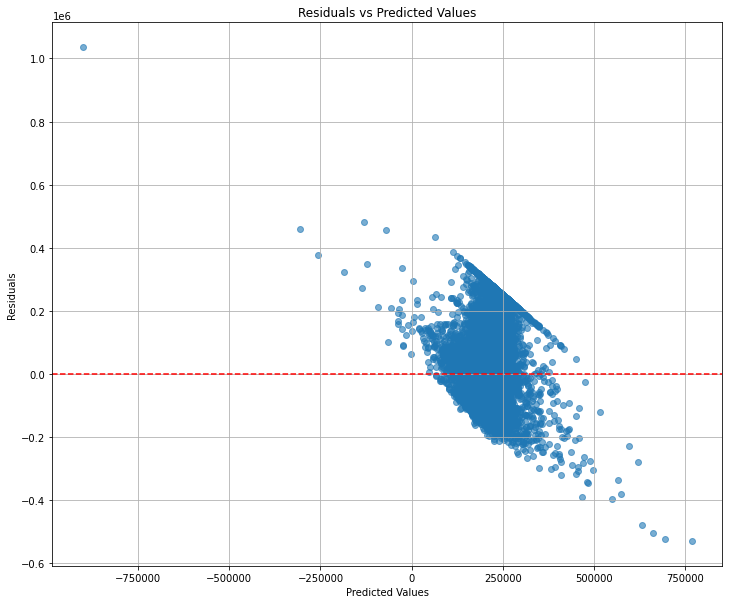

In [62]:
residuals_4 = y - ols_predictions_4

# Plot residuals against predicted values
plt.figure(figsize=(12, 10))
plt.scatter(ols_predictions_4, residuals_4, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.grid(True)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

### **Inference from Residual Plot - Heteroscedasticity**

Let us compare the residual plots of the 2 models after removing variables with high IVF (model 3 and model 4):

- Model 3:
The spread of residuals increases significantly as the fitted values increase. This is evident from the scattered points, where residuals are more dispersed for higher predicted values.

- Model 4: Again, we observe a non-constant variance of residuals. The residuals become more spread as we move from left to right along the x-axis (fitted values).

We can observe heteroscedasticity in both plots above, since residuals are not uniformly distributed across all fitted values. This violates the assumption of constant variance in the errors. This indicates that the models might not be optimal, and their predictions could be less reliable, especially for houses with higher predicted values.

### **Test for Heteroscedasticity**

In [63]:
import statsmodels.stats.api as sms

X_constant1 = sm.add_constant(X_imputed_1)
X_constant2 = sm.add_constant(X_imputed_2)
_, pval_1, _, _ = sms.het_breuschpagan(ols_model_1.resid, X_constant1)
print("Breusch-Pagan test p-value (Model 1):", pval_1)

_, pval_2, _, _ = sms.het_breuschpagan(ols_model_2.resid, X_constant2)
print("Breusch-Pagan test p-value (Model 2):", pval_2)


Breusch-Pagan test p-value (Model 1): 1.409629986855694e-128
Breusch-Pagan test p-value (Model 2): 5.61368541400914e-118


After performing the Breusch-Pagan test for both models, the resulting p-values are very close to 0, strongly suggesting the presence of heteroscedasticity in both models.

### **Testing normality of residuals**

Q-Q Plot

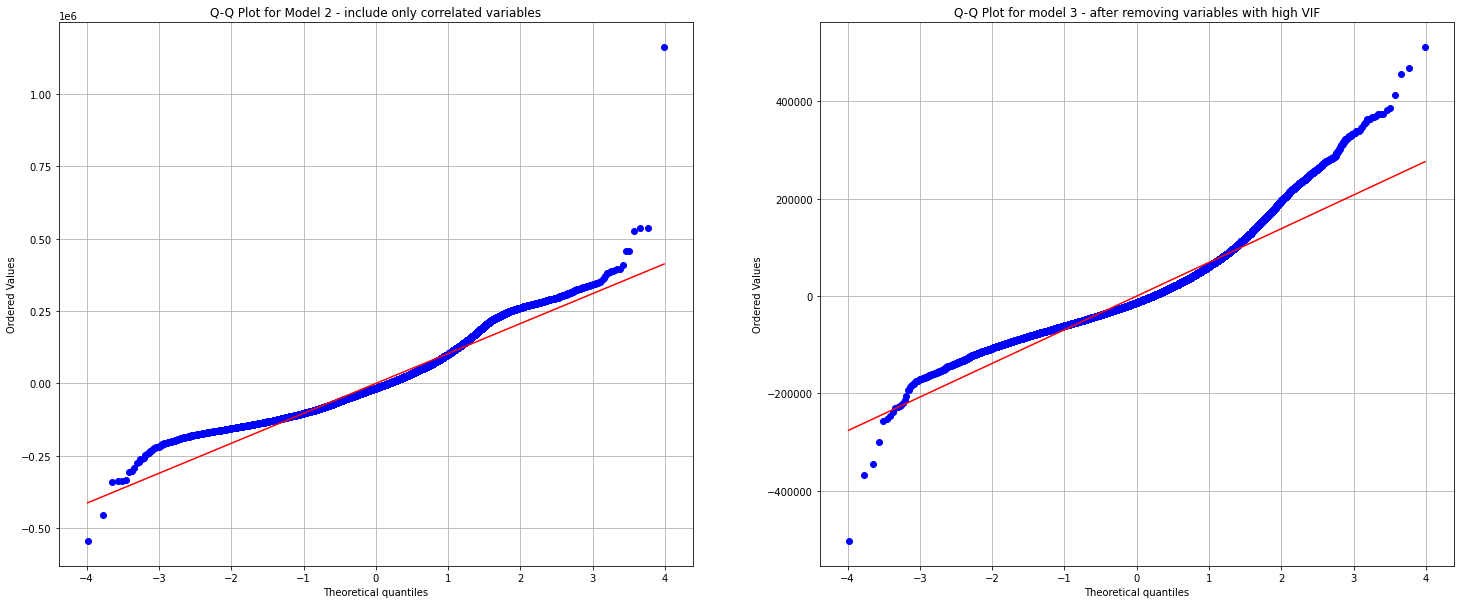

In [64]:
from scipy import stats
# Perform Q-Q plot for normality
plt.figure(figsize=(25,10))

plt.subplot(1,2,1)
stats.probplot(residuals_2, dist="norm", plot=plt)
plt.title("Q-Q Plot for Model 2 - include only correlated variables")
plt.grid(True)


plt.subplot(1,2,2)
stats.probplot(residuals_3, dist="norm", plot=plt)
plt.title("Q-Q Plot for model 3 - after removing variables with high VIF")
plt.grid(True)

plt.show()

### **Observations**

1. In both the models, the points (blue line) deviate significantly from the normal values (indicated by the red line).
2. This suggests that residuals are not normally distributed in both the models.
3. This is particularly more noticable around the tails, where huge deviation for some points can be observed.


- A normal distribution of residuals is an assumption of many regression models, including logistic regression. When this assumption is violated, it can affect the reliability of the model's estimates and predictions.
- Non-normally distributed residuals indicate that the model is not capturing all the underlying patterns in the data or that there are unaccounted-for variables influencing the outcome.

### **Compare AIC**
 
We compare the models 4 (which has a correlated subset of variables as predictors after removing those with high IVF) and 3 (which has all variables after removing those with high VIF)

In [73]:
aic_3 = ols_model_3.aic
aic_4 = ols_model_4.aic

print("AIC for Model 1:", aic_3)
print("AIC for Model 2:", aic_4)

if aic_3 < aic_4:
    best_model = 3
else:
    best_model = 4

print("Best Model (based on AIC):", best_model)

AIC for Model 1: 520249.322526768
AIC for Model 2: 537074.8579091866
Best Model (based on AIC): 3


We observe that model 3 is better than model 4

### Winning model coefficients

In [75]:
import pandas as pd

# Extract coefficients, standard errors, and confidence intervals
coefficients = ols_model_3.params
se = ols_model_3.bse
conf_int = ols_model_3.conf_int()
p_values = ols_model_3.pvalues

# Create a DataFrame to display the results
results = pd.DataFrame({'Coefficient': coefficients,
                        'SE': se,
                        '95% CI Lower': conf_int[0],
                        '95% CI Upper': conf_int[1],
                        'P-value': p_values})

# Display the results
print(results)


         Coefficient           SE   95% CI Lower   95% CI Upper        P-value
const  206855.816909   500.865613  205874.080757  207837.553061   0.000000e+00
x1     -95931.935062  1433.769402  -98742.236309  -93121.633816   0.000000e+00
x2    -102239.799559  1444.497124 -105071.127988  -99408.471130   0.000000e+00
x3      14065.971623   561.701845   12964.991652   15166.951594  2.328927e-136
x4      32868.933686  1088.576778   30735.237241   35002.630131  5.086664e-196
x5     -28715.594607  1059.846713  -30792.977855  -26638.211358  6.927209e-159
x6      65086.888750   573.070991   63963.624354   66210.153145   0.000000e+00


Predictor Variables (x1, x2, x3, x4, x5, x6):

+ Coefficients: -95,931.94 (x1), -102,239.80 (x2), 14,065.97 (x3), 32,868.93 (x4), -28,715.59 (x5), 65,086.89 (x6)
+ Standard Errors (SE): 1433.77 (x1), 1444.50 (x2), 561.70 (x3), 1088.58 (x4), 1059.85 (x5), 573.07 (x6)
+ 95% Confidence Intervals (CI): [98,742.24, 93,121.63] (x1), [105,071.13, 99,408.47] (x2), [12,964.99, 15,166.95] (x3), [30,735.24, 35,002.63] (x4), [30,792.98, 26,638.21] (x5), [63,963.62, 66,210.15] (x6)
+ P-values: 0.000 for all predictor variables

+ Interpretation: These coefficients represent the estimated change in the median house value for a one-unit increase in each predictor variable, holding all other variables constant. For example:
For every one-unit increase in x1, the median house value decreases by approximately $95,932.
For every one-unit increase in x3, the median house value increases by approximately $14,066.
The p-values for all predictor variables are extremely small (close to zero), indicating that all predictors are statistically significant in predicting the median house value.

## Part 2

In [66]:
data2 = pd.read_csv("binary.csv")
data2['intercept'] = 1
data2.head()

,admit,gre,gpa,rank,intercept
0,0,380,3.61,3,1
1,1,660,3.67,3,1
2,1,800,4.00,1,1
3,1,640,3.19,4,1
4,0,520,2.93,4,1


In [67]:
X = data2[['gre', 'gpa', 'rank']]
X = sm.add_constant(X)
y = data2['admit']

model2 = sm.Logit(y, X).fit()
print(model2.summary())


Optimization terminated successfully.
         Current function value: 0.574302
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      396
Method:                           MLE   Df Model:                            3
Date:                Fri, 12 Apr 2024   Pseudo R-squ.:                 0.08107
Time:                        23:03:14   Log-Likelihood:                -229.72
converged:                       True   LL-Null:                       -249.99
Covariance Type:            nonrobust   LLR p-value:                 8.207e-09
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.4495      1.133     -3.045      0.002      -5.670      -1.229
gre            0.0023      0.

### **Observatiobns**: 
1. **GRE Score (gre)**:
    - **Coefficient**: The coefficient for GRE score is approximately **0.0023**.
    - **P-value**: The p-value associated with GRE score is **0.036**.
    - **Confidence Interval**: The 95% confidence interval for the coefficient ranges from approximately **0.000** to **0.004**.
    - **Interpretation**: For every one-unit increase in GRE score, the **log odds** of being admitted increase by approximately **0.0023**. To understand this in terms of odds, we exponentiate the coefficient: \(e^{0.0023} \approx 1.0023\). This means that for each additional GRE point, the odds of being admitted increase by about **0.23%**.

2. **GPA (gpa)**:
    - **Coefficient**: The coefficient for GPA is approximately **0.7770**.
    - **P-value**: The p-value associated with GPA is **0.018**.
    - **Confidence Interval**: The 95% confidence interval for the coefficient ranges from approximately **0.135** to **1.419**.
    - **Interpretation**: For every one-unit increase in GPA, the **log odds** of being admitted increase by approximately **0.7770**. Exponentiating the coefficient: \(e^{0.7770} \approx 2.18\). This implies that each additional GPA point leads to a **118% increase** in the odds of being admitted.

3. **Rank**:
    - **Coefficient**: The coefficient for rank is approximately **-0.5600**.
    - **P-value**: The p-value associated with rank is **<0.001** (highly significant).
    - **Confidence Interval**: The 95% confidence interval for the coefficient ranges from approximately **-0.809** to **-0.311**.
    - **Interpretation**: Lower rank values (indicating higher prestige) are associated with **lower odds** of admission. Exponentiating the coefficient: \(e^{-0.5600} \approx 0.570\). This means that applicants from higher-ranked institutions have **43% lower odds** of being admitted compared to those from lower-ranked institutions.

- To summarise, the most significant predictors of admission are **GPA** (with a positive effect) and **rank** (with a negative effect). Though the p-value for GRE is also small (0.036), but its overall impact on admission is also relatively smaller, as found out by the exponentiation. 
- Applicants with higher GPAs and lower-ranked undergraduate institutions are more likely to be admitted.

## **Interaction Effects**

In [69]:
data2['gpa_rank_interaction'] = data2['gpa']*data2['rank']
X = data2[['gre', 'gpa', 'rank', 'gpa_rank_interaction']]

X = sm.add_constant(X)
model_interaction = sm.Logit(y, X).fit()

print(model_interaction.summary())

Optimization terminated successfully.
         Current function value: 0.574168
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      395
Method:                           MLE   Df Model:                            4
Date:                Fri, 12 Apr 2024   Pseudo R-squ.:                 0.08129
Time:                        23:06:44   Log-Likelihood:                -229.67
converged:                       True   LL-Null:                       -249.99
Covariance Type:            nonrobust   LLR p-value:                 3.188e-08
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -4.3447      2.968     -1.464      0.143     -10.161       1.472

### **Observations of Interaction Effect**

**GPA-Rank Interaction (gpa_rank_interaction)** :
- Coefficient: The coefficient for the interaction term gpa_rank_interaction is approximately -0.1142.
- Interpretation of Coefficient:
A negative coefficient suggests that as the GPA increases, the log odds of admission decrease when considering the institution’s rank.
However, we need to assess whether this effect is statistically meaningful.

- P-value: The p-value associated with this coefficient is 0.743.
- Interpretation of P-value:
The p-value represents the probability that the observed coefficient is due to random chance.
In this case, the high p-value (greater than 0.05) indicates that the interaction effect is not statistically significant.
Therefore, we fail to reject the null hypothesis that the impact of GPA on admission odds significantly differs based on the institution’s rank.

- Practical Implications:
When the interaction effect is not significant, it means that the relationship between GPA and admission odds remains relatively consistent across different institution ranks.
Whether an applicant has a higher or lower GPA does not significantly alter the odds of admission based on the institution they attended.
Applicants’ GPAs appear to have a similar impact on their admission chances regardless of the institution’s prestige.
 